In [1]:
import pandas as pd
from sklearn import cluster
import matplotlib

import matplotlib.pyplot as plt

In [2]:
# load the data
df_3 = pd.read_csv('../Data/cluster_ds3.csv')
df_4 = pd.read_csv('../Data/cluster_ds4.csv')
df_5 = pd.read_csv('../Data/cluster_ds5.csv')

# 1. Exploratory data analysis

### 1.1 Duplicates


In [3]:
# check duplication for ds3 
check_duplication_3 = df_3.duplicated()
duplicated_3 = df_3[check_duplication_3]
print(duplicated_3)

Empty DataFrame
Columns: [x, y, class]
Index: []


In [4]:
# check duplication for ds4
check_duplication_4 = df_4.duplicated()
duplicated_4 = df_4[check_duplication_4]
print(duplicated_4)

Empty DataFrame
Columns: [x, y, class]
Index: []


In [5]:
# check duplication for ds5
check_duplication_5 = df_5.duplicated()
duplicated_5 = df_5[check_duplication_5]
print(duplicated_5)

Empty DataFrame
Columns: [x, y, class]
Index: []


### 1.2 Outliers detection

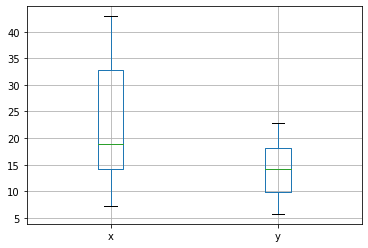

In [9]:
# check outliers for ds3
df_3.drop(['class'],axis=1).boxplot()

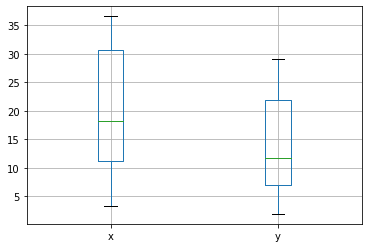

In [10]:
df_4.drop(['class'],axis=1).boxplot()

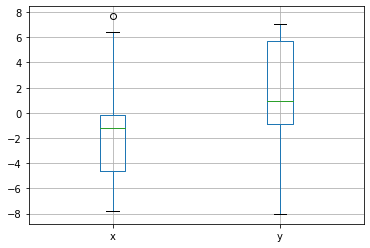

In [11]:
df_5.drop(['class'],axis=1).boxplot()

for outliers we will just keep them

### 1.3 miss values

result: no missing values

In [14]:
# check miss values for df3
empty_3 = pd.isnull(df_3)
has_miss_3 = df_3[empty_3]
print(True in has_miss_3)

False


In [15]:
# check miss values for df4
empty_4 = pd.isnull(df_4)
has_miss_4 = df_4[empty_4]
print(True in has_miss_4)

False


In [16]:
# check miss values for df5
empty_5 = pd.isnull(df_5)
has_miss_5 = df_3[empty_5]
print(True in has_miss_5)

False
